In [1]:
import os
import glob
import re

import pandas as pd
import numpy as np
import matplotlib.pylab as plt

from IPython.display import display


MODELS_PATH = './models/java-small-model'
results = []

In [3]:
models = ['2020_04_05__0.0001_0.0001_0.001__0026d470',
        '2020_04_05__0.0001_0.0001_0.001__2ecc05a5',
        '2020_04_05__0.0001_0.0001_0.001__e152caf0',
        '2020_04_05__0_0_-1__2167eb3d',
        '2020_04_05__0_0_-1__3cff1009',
        '2020_04_05__0_0_-1__4990422c']

In [4]:
models = {'2020_04_07__0_0_-2.0__subtoken_restricted': 24}

In [17]:
models = ['2020_04_09__0_0_-3.0__subtoken_nodes_restricted']

In [2]:
models = ['2020_04_05__0.0001_0.0001_0.001__e152caf0']

In [53]:
coeff_select = [
                 '2020_04_13__1e-05_0.001_-1__556c7315',
                 '2020_04_13__0.0_0.00032_-1__cb617132',
                 '2020_04_13__1e-05_3e-05_-1__26ecce85',
                 '2020_04_13__1e-05_1e-05_-1__d5f7e692',
                 '2020_04_13__1e-05_0.0001_-1__133b3b4a',
                 '2020_04_13__0.0_0.001_-1__2c6b4a81',
                 '2020_04_13__0.0_3e-05_-1__02bbf89b',
                 '2020_04_13__0.0001_0.00032_-1__46537233',
                 '2020_04_13__3e-05_0.001_-1__46a15b73',
                 '2020_04_13__1e-05_0.00032_-1__88e6c7e3',
                 '2020_04_13__0.0_1e-05_-1__acf02da1',
                 '2020_04_13__3e-05_1e-05_-1__e03e1468',
                 '2020_04_13__0.0_0.001_-1__8d50307b',
                 '2020_04_13__3e-05_0.00032_-1__94edc3d2',
                 '2020_04_13__0.0_3e-05_-1__ad2c6b2a',
                 '2020_04_13__0.0_0.0001_-1__c5a5a4c8',
                 '2020_04_13__0.0001_0.0001_-1__d64fba80',
                 '2020_04_13__0.0001_0.001_-1__ca55734c',
                 '2020_04_13__0.0001_3e-05_-1__f6865928',
                 '2020_04_13__0.0_0.0001_-1__f772040c',
                 '2020_04_13__3e-05_3e-05_-1__7502d002',
                 '2020_04_13__0.0_1e-05_-1__b7e86f3e',
                 '2020_04_13__3e-05_0.0001_-1__f83cfcda',
                 '2020_04_13__0.0_0.00032_-1__8cb14a2d',
                 '2020_04_13__0.0001_1e-05_-1__c7b21e93']

In [98]:
coeff_select = ['2020_04_07__0.1_0_-1__b718b076',
                '2020_04_07__0.01_0_-1__53cfd74e',
                '2020_04_07__0.001_0_-1__0f88a7ef',
                '2020_04_07__0.0001_0_-1__92371c27', 
                '2020_04_07__1e-05_0_-1__81cbb810',
                '2020_04_07__1e-06_0_-1__3866b871',
                '2020_04_07__0_0.1_-1__5810e829',
                '2020_04_07__0_0.01_-1__b303bfa9',
                '2020_04_07__0_0.001_-1__facca85d',
                '2020_04_07__0_0.0001_-1__35a3d3de',
                '2020_04_07__0_1e-05_-1__bfb47368',
                '2020_04_07__0_1e-06_-1__be492856',
                '2020_04_05__0_0_-1__2167eb3d']

In [47]:
vocab_words = ['2020_04_11__0_0_-1__632771e7',
               '2020_04_11__0_0_-1__fa0572aa',
               '2020_04_11__0_0_-1__dc65356a',
               '2020_04_05__0_0_-1__2167eb3d',
               '2020_04_13__0_0_-1__2592fca7',
               '2020_04_13__0_0_-1__01b465bd',
               '2020_04_13__0_0_-1__182434f0']

In [37]:
threshold_select  = ['2020_04_21__1e-05_0.0001_0.001__607f3e5d',
                     '2020_04_21__1e-05_0.0001_0.01__a0ea772d',
                     '2020_04_21__1e-05_0.0001_3e-05__829ecb7e',
                     '2020_04_21__1e-05_0.0001_0.00316__eda7e095',
                     '2020_04_21__1e-05_0.0001_0.0__c845667c',
                     '2020_04_21__1e-05_0.0001_0.0001__68faad49',
                     '2020_04_21__1e-05_0.0001_0.0__4ae1c574',
                     '2020_04_21__1e-05_0.0001_1e-05__2c2e103f',
                     '2020_04_21__1e-05_0.0001_0.00032__2a113711',
                     '2020_04_21__1e-05_0.0001_0.0__5c02e2ea',
                     '2020_04_21__1e-05_0.0001_0.0__6d538951',
                     '2020_04_05__0_0_-1__2167eb3d',
                     '2020_04_21__1e-05_0.0001_0.03162__6252cf6e',
                     '2020_04_21__1e-05_0.0001_0.1__2c89f970',
                     '2020_04_21__1e-05_0.0001_0.31623__c8fb4299',
                     '2020_04_21__1e-05_0.0001_1.0__069fade1']

In [141]:
threshold_select = ['2020_04_26__1e-05_0.0001_0.0001__3def0450',
 '2020_04_26__1e-05_0.0001_0.0__2e9a9701',
 '2020_04_26__1e-05_0.0001_0.01__d6293cef',
 '2020_04_26__1e-05_0.0001_3e-05__9ad2b499',
 '2020_04_26__1e-05_0.0001_0.0__b3c3ce5f',
 '2020_04_26__1e-05_0.0001_0.0__98c93f16',
 '2020_04_26__1e-05_0.0001_0.00032__d71bf80c',
 '2020_04_26__1e-05_0.0001_0.00316__d83f6646',
 '2020_04_26__1e-05_0.0001_0.001__a23dca3d',
 '2020_04_26__1e-05_0.0001_1e-05__a8b95222',
 '2020_04_26__1e-05_0.0001_0.0__27e8d9fc',
 '2020_04_26__1e-05_0.0001_0.03162__9220e5cb',
 '2020_04_21__1e-05_0.0001_0.00316__eda7e095',
 '2020_04_26__1e-05_0.0001_0.1__b6a395d8']

In [4]:
threshold_select = ['2020_04_28__1e-05_0.0001_0.01292__e10e822c',
 '2020_04_28__1e-05_0.0001_0.001__54f057c2',
 '2020_04_28__1e-05_0.0001_0.00167__f3194160',
 '2020_04_28__1e-05_0.0001_0.00464__0fea58fc',
 '2020_04_28__1e-05_0.0001_0.00774__0397ddca',
 '2020_04_28__1e-05_0.0001_0.00278__3c0194ac',
 '2020_04_28__1e-05_0.0001_0.02154__4a2bd92a',
 '2020_04_28__1e-05_0.0001_0.05995__adf57025',
 '2020_04_28__1e-05_0.0001_0.03594__4dd0b027',
 '2020_04_28__1e-05_0.0001_0.1__dce2e66f']

In [3]:
models_001_threshhold_comp = ['2020_04_28__1e-05_0.0001_0.00774__0397ddca',
                              '2020_04_26__1e-05_0.0001_0.01__d6293cef']

In [32]:
models = [
 '2020_05_02__1e-05_0.0001_0.01__5a2781b1',
 '2020_05_02__1e-05_0.0001_0.01__c4e7bb34',
 '2020_05_02__1e-05_0.0001_0.01__0bc79fc2',
 '2020_05_02__1e-05_0.0001_0.01__5e793fcd',
 '2020_05_02__1e-05_0.0001_0.01__53ac65b1',
 '2020_05_02__1e-05_0.0001_0.01__0d646cb7',
 '2020_05_02__1e-05_0.0001_0.01__bedfb2fa',
 '2020_05_02__1e-05_0.0001_0.01__2fc403de',
 '2020_05_02__1e-05_0.0001_0.01__6b0776c6',
 '2020_05_02__1e-05_0.0001_0.01__582ca311']

# 5 with nodes and 5 without

In [3]:
models = models_001_threshhold_comp

NameError: name 'models_001_threshhold_comp' is not defined

# Best epoch and validation

In [33]:
def get_sublist_idx(x, y):
    l1, l2 = len(x), len(y)
    for i in range(l1):
        if x[i:i + l2] == y:
            return i
    return None


non_decimal = re.compile(r'[^\d.]+')

results = []
for model in models:
    out_files = glob.glob(MODELS_PATH + '/' + model + "/*.out")
    if out_files == []:
        print(model)
        raise "No .out files"
    train_out = out_files[0]
    
    with open(train_out) as f:
        text = f.read().split()
        try:
            s_i = text.index('---------Sparsification')
        except Exception:
            print(model)
            raise Exception
        
        Lasso, GroupLasso, Threshold = map(float, [text[s_i + 4], 
                                                   text[s_i + 8],
                                                   text[s_i + 14]])
        sparse_nodes, sparse_subtoken = None, None
        try:
            sparse_nodes, sparse_subtoken = text[s_i + 18], text[s_i + 22]
        except:
            pass
        
        try:
            best_epoch = int(non_decimal.sub('', text[-7]))
            val_prec, val_rec, val_F = map(lambda x: float(non_decimal.sub('', x)), [text[-5], text[-3], text[-1]])
        except:
            last_saved_epoch_index = len(text) - text[::-1].index('Saved') + 1
            best_epoch = int(non_decimal.sub('', text[last_saved_epoch_index]))
            after_index = get_sublist_idx(text, ['After', str(best_epoch)])
            val_prec, val_rec, val_F = map(lambda x: float(non_decimal.sub('', x)), [text[after_index + 4], 
                                                                                     text[after_index + 6], 
                                                                                     text[after_index + 8]])
            
        
        subtoken_words, nodes_words = map(lambda x: int(non_decimal.sub('', x)), [text[6], text[17]])
        
        
        results.append([model, subtoken_words, nodes_words, Lasso, GroupLasso, Threshold, 
                        best_epoch, val_prec, val_rec, val_F, sparse_nodes, sparse_subtoken])
        
    
    err_files = glob.glob(MODELS_PATH + '/' + model + "/*.err")
    if err_files == []:
        print(model)
        raise "No .out files"
    errors_out = err_files[0]
    
    with open(errors_out) as f:
        text = f.read().split()
        
        index = get_sublist_idx(text, ['Indicators', 'after', str(best_epoch), 'epochs:'])
        
        if not(index):
            raise 'Not found results in .err'
        _, _, nodes_words_left, subtoken_words_left, _, _ = \
                            list(filter(None, re.split(r'[\]\[]', text[index + 17])))
        nodes_words_left = int(nodes_words_left)
        subtoken_words_left =  int(subtoken_words_left)
        
        results[-1] += [subtoken_words_left, nodes_words_left]

In [35]:
results = pd.DataFrame(results, 
     columns=['folder', 'SUBTOKEN_words_max', 'NODES_words_max', 
              'Lasso', 'GroupLasso', 'Threshold', 'best_epoch', 'Val_Prec', 'Val_Rec', 'Val_F1',
              'sparse_NODES', 'sparse_SUBTOKEN',
              'SUBTOKEN_words_left', 'NODES_words_left'])

In [36]:
results

,folder,SUBTOKEN_words_max,NODES_words_max,Lasso,GroupLasso,Threshold,best_epoch,Val_Prec,Val_Rec,Val_F1,sparse_NODES,sparse_SUBTOKEN,SUBTOKEN_words_left,NODES_words_left
0,2020_05_02__1e-05_0.0001_0.01__5a2781b1,73906,323,0.00001,0.0001,0.01,60,0.48040,0.37376,0.42042,True,True,33467,244
1,2020_05_02__1e-05_0.0001_0.01__c4e7bb34,73906,323,0.00001,0.0001,0.01,33,0.47052,0.35816,0.40672,False,True,73901,323
2,2020_05_02__1e-05_0.0001_0.01__0bc79fc2,73906,323,0.00001,0.0001,0.01,46,0.49042,0.37271,0.42354,False,True,66951,323
3,2020_05_02__1e-05_0.0001_0.01__5e793fcd,73906,323,0.00001,0.0001,0.01,25,0.48851,0.36844,0.42007,True,True,73905,323
4,2020_05_02__1e-05_0.0001_0.01__53ac65b1,73906,323,0.00001,0.0001,0.01,47,0.48228,0.38007,0.42512,False,True,65075,323
5,2020_05_02__1e-05_0.0001_0.01__0d646cb7,73906,323,0.00001,0.0001,0.01,46,0.48516,0.37119,0.42059,True,True,66956,311
6,2020_05_02__1e-05_0.0001_0.01__bedfb2fa,73906,323,0.00001,0.0001,0.01,55,0.48192,0.37821,0.42382,False,True,44862,323
7,2020_05_02__1e-05_0.0001_0.01__2fc403de,73906,323,0.00001,0.0001,0.01,70,0.47804,0.37325,0.41919,False,True,20333,323
8,2020_05_02__1e-05_0.0001_0.01__6b0776c6,73906,323,0.00001,0.0001,0.01,36,0.48430,0.36968,0.41929,True,True,73840,323
9,2020_05_02__1e-05_0.0001_0.01__582ca311,73906,323,0.00001,0.0001,0.01,57,0.49205,0.38022,0.42897,True,True,39902,257


# Release

In [8]:
for index, row in results.iterrows():
    folder = results.iloc[index]['folder']
    epoch = results.iloc[index]['best_epoch']
    command = f'python code2seq.py --load models/java-small-model/{folder}/model_iter{epoch} --release'
    os.system(f'sbatch --error=./slurm/%j.err --output=./slurm/%j.out -J c2s_release --gres=gpu:1 -c 4 --wrap=\"{command}\"')

# Test

In [21]:
for index, row in results.iterrows():
    folder = results.iloc[index]['folder']
    epoch = results.iloc[index]['best_epoch']
    command = f'python3 code2seq.py --load {MODELS_PATH}/{folder}/model_iter{epoch}.release --test data/java-small/java-small.test.c2s'
    os.system(f'sbatch --error=./slurm/{folder}.err --output=./slurm/{folder}.out -J c2s_test --gres=gpu:1 -c 4 --wrap=\"{command}\"')


# Get test results

In [37]:
import pandas as pd

results['Test_Prec'] = 0.
results['Test_Rec'] = 0.
results['Test_F1'] = 0.

for index, row in results.iterrows():
    folder = results.iloc[index]['folder']
    epoch = results.iloc[index]['best_epoch']
    
    with open(f'./slurm/{folder}.out') as f:
        text = f.read().split()
        try:
            prec_i = text.index('Precision:') + 1
            rec_i = text.index('recall:') + 1   
            f_i = text.index('F1:') + 1
        except:
            print(results['folder'][index])
            raise
        
        prec, rec, f = list(map(lambda a: float(a.rstrip(',')), [text[prec_i], text[rec_i], text[f_i]]))
        results['Test_Prec'][index] = prec
        results['Test_Rec'][index] = rec
        results['Test_F1'][index] = f

/home/aagusev2/anaconda3/envs/tf_env/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/aagusev2/anaconda3/envs/tf_env/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/aagusev2/anaconda3/envs/tf_env/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [38]:
sorted_results = results[[ 'Lasso', 'GroupLasso', 'Threshold', 'best_epoch', 'Val_Prec', 'Val_Rec', 'Val_F1', 'Test_Prec',
'Test_Rec', 'Test_F1', 'SUBTOKEN_words_left', 'NODES_words_left']].sort_values(by=['Threshold'], ascending=False)

display(sorted_results)

display(results.groupby(['Lasso', 'GroupLasso', 'Threshold']).mean()[['Val_Prec', 'Val_Rec', 'Val_F1', 
                                                                      'Test_Prec', 'Test_Rec', 'Test_F1']])

,Lasso,GroupLasso,Threshold,best_epoch,Val_Prec,Val_Rec,Val_F1,Test_Prec,Test_Rec,Test_F1,SUBTOKEN_words_left,NODES_words_left
0,0.00001,0.0001,0.01,60,0.48040,0.37376,0.42042,0.484769,0.373551,0.421955,33467,244
1,0.00001,0.0001,0.01,33,0.47052,0.35816,0.40672,0.487080,0.367750,0.419086,73901,323
2,0.00001,0.0001,0.01,46,0.49042,0.37271,0.42354,0.492917,0.367121,0.420819,66951,323
3,0.00001,0.0001,0.01,25,0.48851,0.36844,0.42007,0.490197,0.364036,0.417800,73905,323
4,0.00001,0.0001,0.01,47,0.48228,0.38007,0.42512,0.481380,0.371450,0.419330,65075,323
5,0.00001,0.0001,0.01,46,0.48516,0.37119,0.42059,0.480985,0.371969,0.419510,66956,311
6,0.00001,0.0001,0.01,55,0.48192,0.37821,0.42382,0.483638,0.372858,0.421084,44862,323
7,0.00001,0.0001,0.01,70,0.47804,0.37325,0.41919,0.482801,0.372360,0.420449,20333,323
8,0.00001,0.0001,0.01,36,0.48430,0.36968,0.41929,0.483586,0.369919,0.419184,73840,323
9,0.00001,0.0001,0.01,57,0.49205,0.38022,0.42897,0.479694,0.370439,0.418046,39902,257


,,,Val_Prec,Val_Rec,Val_F1,Test_Prec,Test_Rec,Test_F1
Lasso,GroupLasso,Threshold,,,,,,
0.00001,0.0001,0.01,0.48336,0.372569,0.420773,0.484705,0.370145,0.419726


# Sparsification by epochs

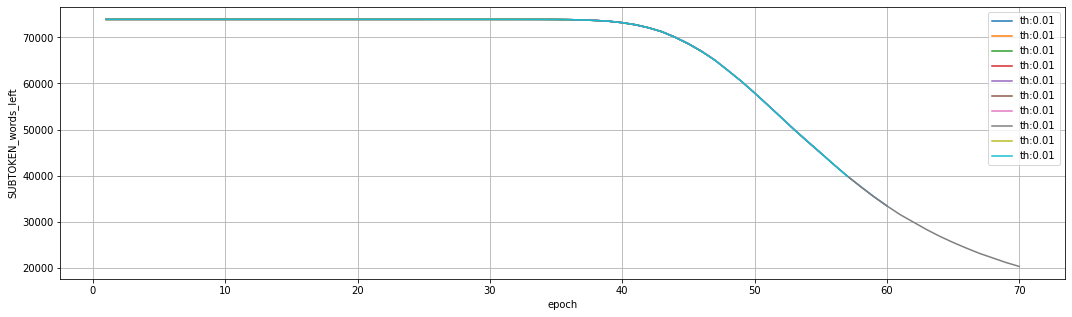

In [41]:
plt.figure(figsize=(18, 5))

for index, row in results.iterrows():
    folder = results.iloc[index]['folder']
    best_epoch = results.iloc[index]['best_epoch']
    threshold = results.iloc[index]['Threshold']
    
    soubtoken_vocab_left_history = []
    nodes_vocab_left_history = []
    
    err_files = glob.glob(MODELS_PATH + '/' + folder + "/*.err")
    if err_files == []:
        print(model)
        raise "No .out files"
    errors_out = err_files[0]
    
    with open(errors_out) as f:
        text = f.read().split()
        
        for epoch in range(1, best_epoch + 1):
            index = get_sublist_idx(text, ['Indicators', 'after', str(epoch), 'epochs:'])
            if not(index):
                print(folder, epoch)
                print(text)
                raise 'Not found results in .err'
            _, _, nodes_words_left, subtoken_words_left, _, _ = \
                                list(filter(None, re.split(r'[\]\[]', text[index + 17])))
            nodes_words_left = int(nodes_words_left)
            subtoken_words_left =  int(subtoken_words_left)

            soubtoken_vocab_left_history.append(subtoken_words_left)
            nodes_vocab_left_history.append(nodes_words_left)

#     fig, axs = plt.subplots(2, 1, figsize=(18, 10), sharex=True)

#     axs[0].plot(range(1, best_epoch + 1), nodes_vocab_left_history)
#     axs[0].set_ylabel('NODES_words_left')
#     axs[0].grid(True)

#     axs[1].plot(range(1, best_epoch + 1), soubtoken_vocab_left_history)
#     axs[1].set_ylabel('SUBTOKEN_words_left')
#     axs[1].grid(True)

#     fig.suptitle('Sparsification by epoch')
#     plt.xlabel('epoch')
#     plt.show()

    

    plt.plot(range(1, best_epoch + 1), soubtoken_vocab_left_history, label=f'th:{threshold}')
    
    

plt.ylabel('SUBTOKEN_words_left')
plt.xlabel('epoch')
plt.legend()
plt.grid()
plt.show()

    

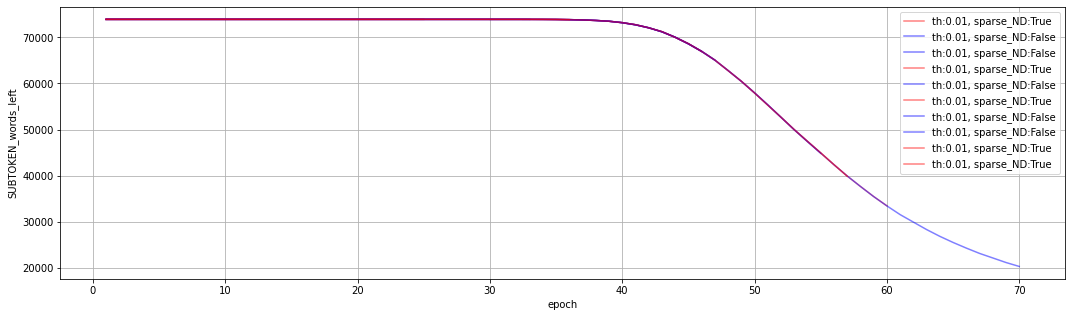

In [52]:
plt.figure(figsize=(18, 5))

for index, row in results.iterrows():
    folder = results.iloc[index]['folder']
    best_epoch = results.iloc[index]['best_epoch']
    threshold = results.iloc[index]['Threshold']
    
    soubtoken_vocab_left_history = []
    nodes_vocab_left_history = []
    
    err_files = glob.glob(MODELS_PATH + '/' + folder + "/*.err")
    if err_files == []:
        print(model)
        raise "No .out files"
    errors_out = err_files[0]
    
    with open(errors_out) as f:
        text = f.read().split()
        
        for epoch in range(1, best_epoch + 1):
            index = get_sublist_idx(text, ['Indicators', 'after', str(epoch), 'epochs:'])
            if not(index):
                print(folder, epoch)
                print(text)
                raise 'Not found results in .err'
            _, _, nodes_words_left, subtoken_words_left, _, _ = \
                                list(filter(None, re.split(r'[\]\[]', text[index + 17])))
            nodes_words_left = int(nodes_words_left)
            subtoken_words_left =  int(subtoken_words_left)

            soubtoken_vocab_left_history.append(subtoken_words_left)
            nodes_vocab_left_history.append(nodes_words_left)

#     fig, axs = plt.subplots(2, 1, figsize=(18, 10), sharex=True)

#     axs[0].plot(range(1, best_epoch + 1), nodes_vocab_left_history)
#     axs[0].set_ylabel('NODES_words_left')
#     axs[0].grid(True)

#     axs[1].plot(range(1, best_epoch + 1), soubtoken_vocab_left_history)
#     axs[1].set_ylabel('SUBTOKEN_words_left')
#     axs[1].grid(True)

#     fig.suptitle('Sparsification by epoch')
#     plt.xlabel('epoch')
#     plt.show()

    sparse_NODES = row['sparse_NODES']

    if sparse_NODES == 'True':
        plt.plot(range(1, best_epoch + 1), soubtoken_vocab_left_history, 
                 alpha=0.5,
                 c='red',
                 label=f'th:{threshold}, sparse_ND:{sparse_NODES}')
    else:
        plt.plot(range(1, best_epoch + 1), soubtoken_vocab_left_history, 
                 alpha=0.5,
                 c='blue',
                 label=f'th:{threshold}, sparse_ND:{sparse_NODES}')
    
    
    

plt.ylabel('SUBTOKEN_words_left')
plt.xlabel('epoch')
plt.legend()
plt.grid()
plt.show()

    

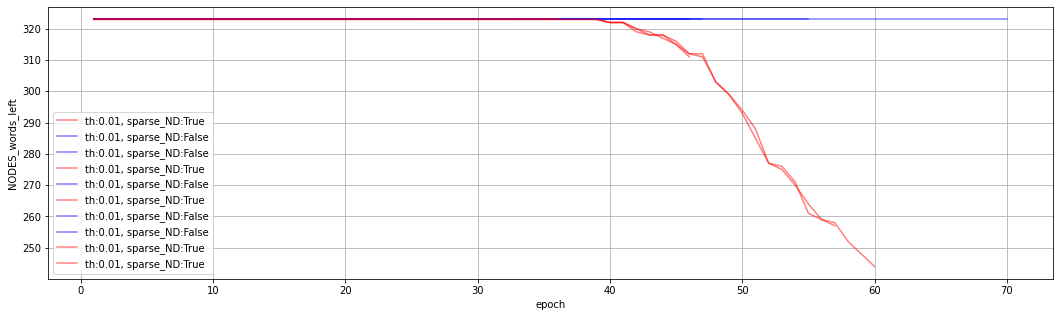

In [50]:
plt.figure(figsize=(18, 5))

for index, row in results.iterrows():
    folder = results.iloc[index]['folder']
    best_epoch = results.iloc[index]['best_epoch']
    threshold = results.iloc[index]['Threshold']
    
    soubtoken_vocab_left_history = []
    nodes_vocab_left_history = []
    
    err_files = glob.glob(MODELS_PATH + '/' + folder + "/*.err")
    if err_files == []:
        print(model)
        raise "No .out files"
    errors_out = err_files[0]
    
    with open(errors_out) as f:
        text = f.read().split()
        
        for epoch in range(1, best_epoch + 1):
            index = get_sublist_idx(text, ['Indicators', 'after', str(epoch), 'epochs:'])
            if not(index):
                print(folder, epoch)
                print(text)
                raise 'Not found results in .err'
            _, _, nodes_words_left, subtoken_words_left, _, _ = \
                                list(filter(None, re.split(r'[\]\[]', text[index + 17])))
            nodes_words_left = int(nodes_words_left)
            subtoken_words_left =  int(subtoken_words_left)

            soubtoken_vocab_left_history.append(subtoken_words_left)
            nodes_vocab_left_history.append(nodes_words_left)

#     fig, axs = plt.subplots(2, 1, figsize=(18, 10), sharex=True)

#     axs[0].plot(range(1, best_epoch + 1), nodes_vocab_left_history)
#     axs[0].set_ylabel('NODES_words_left')
#     axs[0].grid(True)

#     axs[1].plot(range(1, best_epoch + 1), soubtoken_vocab_left_history)
#     axs[1].set_ylabel('SUBTOKEN_words_left')
#     axs[1].grid(True)

#     fig.suptitle('Sparsification by epoch')
#     plt.xlabel('epoch')
#     plt.show()

    sparse_NODES = row['sparse_NODES']

    if sparse_NODES == 'True':
        plt.plot(range(1, best_epoch + 1), nodes_vocab_left_history, 
                 alpha=0.5,
                 c='red',
                 label=f'th:{threshold}, sparse_ND:{sparse_NODES}')
    else:
        plt.plot(range(1, best_epoch + 1), nodes_vocab_left_history, 
                 alpha=0.5,
                 c='blue',
                 label=f'th:{threshold}, sparse_ND:{sparse_NODES}')
    
    

plt.ylabel('NODES_words_left')
plt.xlabel('epoch')
plt.legend()
plt.grid()
plt.show()

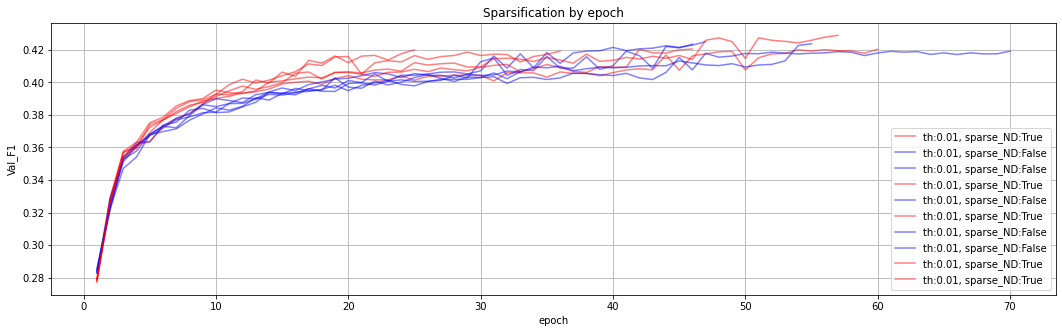

In [48]:
plt.figure(figsize=(18, 5))

for index, row in results.iterrows():
    folder = results.iloc[index]['folder']
    best_epoch = results.iloc[index]['best_epoch']
    threshold = results.iloc[index]['Threshold']
    
    val_f1_history = []
    
    out_files = glob.glob(MODELS_PATH + '/' + folder + "/*.out")
    if out_files == []:
        print(model)
        raise "No .out files"
    train_out = out_files[0]
    
    with open(train_out) as f:
        text = f.read().split()
        
        for epoch in range(1, best_epoch + 1):
            after_index = get_sublist_idx(text, ['After', str(epoch), 'epochs:'])
            if not(after_index):
                raise 'Not found results in .out'
             
            val_prec, val_rec, val_F = map(lambda x: float(non_decimal.sub('', x)), [text[after_index + 4], 
                                                                                     text[after_index + 6], 
                                                                                     text[after_index + 8]])
            
            
            val_f1_history.append(val_F)
            
    sparse_NODES = row['sparse_NODES']

    if sparse_NODES == 'True':
        plt.plot(range(1, best_epoch + 1), val_f1_history, 
                 alpha=0.5,
                 c='red',
                 label=f'th:{threshold}, sparse_ND:{sparse_NODES}')
    else:
        plt.plot(range(1, best_epoch + 1), val_f1_history, 
                 alpha=0.5,
                 c='blue',
                 label=f'th:{threshold}, sparse_ND:{sparse_NODES}')

    

plt.title('Sparsification by epoch')
plt.ylabel('Val_F1')
plt.xlabel('epoch')
plt.legend()
plt.grid()
plt.show()

    

In [27]:
results

,folder,SUBTOKEN_words_max,NODES_words_max,Lasso,GroupLasso,Threshold,best_epoch,Val_Prec,Val_Rec,Val_F1,SUBTOKEN_words_left,NODES_words_left,Test_Prec,Test_Rec,Test_F1
0,2020_05_02__1e-05_0.0001_0.01__5a2781b1,73906,323,0.00001,0.0001,0.01,60,0.48040,0.37376,0.42042,33467,244,0.484769,0.373551,0.421955
1,2020_05_02__1e-05_0.0001_0.01__c4e7bb34,73906,323,0.00001,0.0001,0.01,33,0.47052,0.35816,0.40672,73901,323,0.487080,0.367750,0.419086
2,2020_05_02__1e-05_0.0001_0.01__0bc79fc2,73906,323,0.00001,0.0001,0.01,46,0.49042,0.37271,0.42354,66951,323,0.492917,0.367121,0.420819
3,2020_05_02__1e-05_0.0001_0.01__5e793fcd,73906,323,0.00001,0.0001,0.01,25,0.48851,0.36844,0.42007,73905,323,0.490197,0.364036,0.417800
4,2020_05_02__1e-05_0.0001_0.01__53ac65b1,73906,323,0.00001,0.0001,0.01,47,0.48228,0.38007,0.42512,65075,323,0.481380,0.371450,0.419330
5,2020_05_02__1e-05_0.0001_0.01__0d646cb7,73906,323,0.00001,0.0001,0.01,46,0.48516,0.37119,0.42059,66956,311,0.480985,0.371969,0.419510
6,2020_05_02__1e-05_0.0001_0.01__bedfb2fa,73906,323,0.00001,0.0001,0.01,55,0.48192,0.37821,0.42382,44862,323,0.483638,0.372858,0.421084
7,2020_05_02__1e-05_0.0001_0.01__2fc403de,73906,323,0.00001,0.0001,0.01,70,0.47804,0.37325,0.41919,20333,323,0.482801,0.372360,0.420449
8,2020_05_02__1e-05_0.0001_0.01__6b0776c6,73906,323,0.00001,0.0001,0.01,36,0.48430,0.36968,0.41929,73840,323,0.483586,0.369919,0.419184
9,2020_05_02__1e-05_0.0001_0.01__582ca311,73906,323,0.00001,0.0001,0.01,57,0.49205,0.38022,0.42897,39902,257,0.479694,0.370439,0.418046


# Graphics

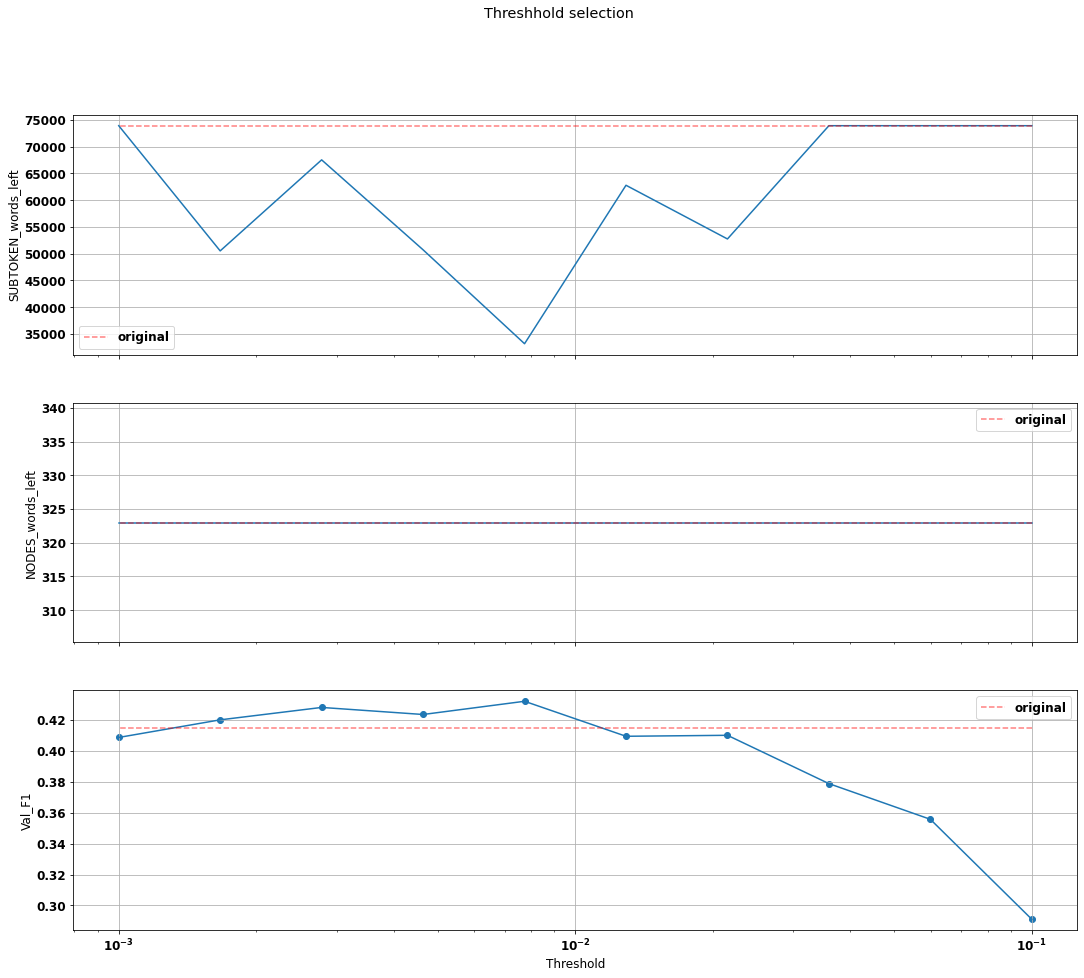

In [61]:
fig, axs = plt.subplots(3, 1, figsize=(18, 15), sharex=True)

orig_f1, orig_subtoken, orig_nodes = np.ones((3, sorted_results['Threshold'].size)) * \
                                        np.array([0.41495, 73906, 323]).reshape((-1, 1))

axs[0].plot(sorted_results['Threshold'], sorted_results['SUBTOKEN_words_left'])
axs[0].set_ylabel('SUBTOKEN_words_left')
axs[0].plot(sorted_results['Threshold'], orig_subtoken, color='red', linestyle='--', alpha=0.5, label='original')
axs[0].grid(True)
axs[0].legend()
# axs[0].set_yscale('log')
axs[0].set_xscale('log')

axs[1].plot(sorted_results['Threshold'], sorted_results['NODES_words_left'])
axs[1].plot(sorted_results['Threshold'], orig_nodes, color='red', linestyle='--', alpha=0.5, label='original')
axs[1].set_ylabel('NODES_words_left')
axs[1].grid(True)
axs[1].legend()
# axs[1].set_yscale('log')

axs[2].plot(sorted_results['Threshold'], sorted_results['Val_F1'])
axs[2].plot(sorted_results['Threshold'], orig_f1, color='red', linestyle='--', alpha=0.5, label='original')
axs[2].scatter(results['Threshold'], results['Val_F1'])
axs[2].set_ylabel('Val_F1')
axs[2].grid(True)
axs[2].legend()
# axs[2].set_yscale('log')

fig.suptitle('Threshhold selection')
plt.xlabel('Threshold')
plt.grid(True)
plt.show()

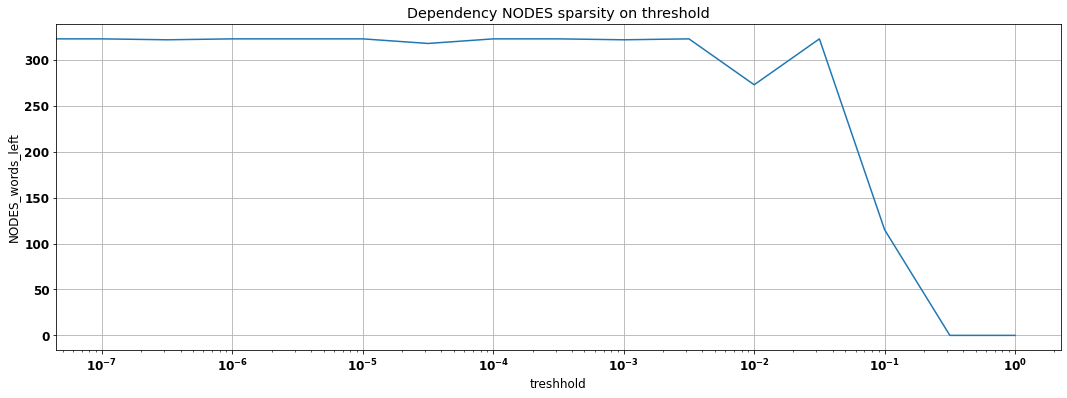

In [116]:
from matplotlib import pyplot as plt
%matplotlib inline

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 12}

plt.rc('font', **font)


plt.figure(figsize=(18, 6))

plt.title('Dependency NODES sparsity on threshold')
plt.xticks(results['Threshold'])
plt.xlabel('treshhold')
plt.ylabel('NODES_words_left')
plt.xscale('log')
plt.plot(results['Threshold'], results['NODES_words_left'])

plt.grid()
plt.show()

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 12}

plt.rc('font', **font)


plt.figure(figsize=(18, 6))

plt.title('Dependency validation F1-score on threshold')
plt.xticks(results['Threshold'])
plt.xlabel('treshhold')
plt.ylabel('Val_F1')
plt.xscale('log')
plt.plot(results['Threshold'], results['Val_F1'])

plt.grid()
plt.show()

In [70]:
! pip install matplotlib

## Get sorted by time folders

In [16]:
import os

models_dir = "./models/java-small-model"
os.chdir(models_dir)
search_dir = './'
model_folders = filter(os.path.isdir, os.listdir(search_dir))
model_folders = [os.path.join(search_dir, f) for f in model_folders] # add path to each file
model_folders.sort(key=lambda x: os.path.getctime(x), reverse=True)
back_dir = "./../../"
os.chdir(back_dir)

In [17]:
list(map(lambda s: s[2:], model_folders[:16]))

['2020_05_02__1e-05_0.0001_0.01__67cfd40a',
 '2020_05_02__1e-05_0.0001_0.01__5a2781b1',
 '2020_05_02__1e-05_0.0001_0.01__0dab835f',
 '2020_05_02__1e-05_0.0001_0.01__c91e10d7',
 '2020_05_02__1e-05_0.0001_0.01__c4e7bb34',
 '2020_05_02__1e-05_0.0001_0.01__0bc79fc2',
 '2020_05_02__1e-05_0.0001_0.01__5e793fcd',
 '2020_05_02__1e-05_0.0001_0.01__53ac65b1',
 '2020_05_02__1e-05_0.0001_0.01__0d646cb7',
 '2020_05_02__1e-05_0.0001_0.01__bedfb2fa',
 '2020_05_02__1e-05_0.0001_0.01__2fc403de',
 '2020_05_02__1e-05_0.0001_0.01__6b0776c6',
 '2020_05_02__1e-05_0.0001_0.01__582ca311',
 '2020_04_28__1e-05_0.0001_0.03594__4dd0b027',
 '2020_04_28__1e-05_0.0001_0.1__dce2e66f',
 '2020_04_28__1e-05_0.0001_0.02154__4a2bd92a']

In [6]:
results

,jobID,lasso,group_lasso,threshold,epochs,Precision,recall,F1,NODES_VOCAB nonzeros,SUBTOKEN_VOCAB nonzeros,Lasso Reg,Group Lasso Reg
0,34508,0.0001,0.0001,1.000000e-03,24,0.47440,0.35912,0.40879,1236,30258,0.225216,0.065769
1,34510,0.0001,0.0001,1.000000e-05,64,0.46884,0.36772,0.41217,1486,74339,0.271612,0.061684
2,34511,0.0001,0.0001,1.000000e-06,75,0.46578,0.37260,0.41401,3986,148216,0.301428,0.062066
3,34512,0.0001,0.0001,1.000000e-07,24,0.46324,0.36765,0.40995,18028,6730523,0.408273,0.073424
4,34513,0.0000,0.0001,1.000000e-05,37,0.46248,0.36882,0.41037,40333,9413252,0.000000,4.115718
5,34514,0.0001,0.0000,1.000000e-05,60,0.47707,0.38251,0.42459,1434,73891,0.316947,0.000000


In [32]:
! squeue

             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
             58829    normal BAR_0.0_  ybudkov PD       0:00      1 (QOSMaxCpuPerUserLimit)
             58830    normal BAR_0.2_  ybudkov PD       0:00      1 (QOSMaxCpuPerUserLimit)
             58831    normal BAR_0.3_  ybudkov PD       0:00      1 (QOSMaxCpuPerUserLimit)
             58832    normal BAR_0.4_  ybudkov PD       0:00      1 (QOSMaxCpuPerUserLimit)
             58833    normal BAR_0.5_  ybudkov PD       0:00      1 (QOSMaxCpuPerUserLimit)
             58834    normal BAR_0.6_  ybudkov PD       0:00      1 (QOSMaxCpuPerUserLimit)
             58835    normal BAR_0.7_  ybudkov PD       0:00      1 (QOSMaxCpuPerUserLimit)
             58836    normal BAR_0.8_  ybudkov PD       0:00      1 (QOSMaxCpuPerUserLimit)
             58837    normal BAR_1.0_  ybudkov PD       0:00      1 (QOSMaxCpuPerUserLimit)
             58838    normal BAR_1.0_  ybudkov PD       0:00      1 (QOSMaxCpuPerUserLi